In [5]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


Using TensorFlow backend.


In [6]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)


In [7]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)


(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [9]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [10]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [11]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])
    

Epoch 1/2000
 - 1s - loss: 2.3824 - acc: 0.3400
Epoch 2/2000
 - 0s - loss: 2.2553 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.1611 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.0703 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.0050 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 1.9747 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9488 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9215 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.8991 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.8835 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8706 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8517 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8406 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8264 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.8121 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.8032 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.7908 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.7784 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.7722 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.7599 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

 - 0s - loss: 1.2781 - acc: 0.5400
Epoch 168/2000
 - 0s - loss: 1.2761 - acc: 0.5800
Epoch 169/2000
 - 0s - loss: 1.2726 - acc: 0.5600
Epoch 170/2000
 - 0s - loss: 1.2673 - acc: 0.5600
Epoch 171/2000
 - 0s - loss: 1.2646 - acc: 0.5600
Epoch 172/2000
 - 0s - loss: 1.2631 - acc: 0.5600
Epoch 173/2000
 - 0s - loss: 1.2608 - acc: 0.5600
Epoch 174/2000
 - 0s - loss: 1.2623 - acc: 0.5600
Epoch 175/2000
 - 0s - loss: 1.2542 - acc: 0.5600
Epoch 176/2000
 - 0s - loss: 1.2620 - acc: 0.5400
Epoch 177/2000
 - 0s - loss: 1.2506 - acc: 0.5600
Epoch 178/2000
 - 0s - loss: 1.2485 - acc: 0.5600
Epoch 179/2000
 - 0s - loss: 1.2555 - acc: 0.5400
Epoch 180/2000
 - 0s - loss: 1.2606 - acc: 0.5600
Epoch 181/2000
 - 0s - loss: 1.2441 - acc: 0.5600
Epoch 182/2000
 - 0s - loss: 1.2396 - acc: 0.5600
Epoch 183/2000
 - 0s - loss: 1.2377 - acc: 0.5400
Epoch 184/2000
 - 0s - loss: 1.2372 - acc: 0.5600
Epoch 185/2000
 - 0s - loss: 1.2339 - acc: 0.5600
Epoch 186/2000
 - 0s - loss: 1.2345 - acc: 0.5600
Epoch 187/2000


 - 0s - loss: 0.9822 - acc: 0.6000
Epoch 332/2000
 - 0s - loss: 0.9773 - acc: 0.6000
Epoch 333/2000
 - 0s - loss: 0.9836 - acc: 0.6000
Epoch 334/2000
 - 0s - loss: 0.9862 - acc: 0.6200
Epoch 335/2000
 - 0s - loss: 0.9852 - acc: 0.6000
Epoch 336/2000
 - 0s - loss: 0.9735 - acc: 0.6000
Epoch 337/2000
 - 0s - loss: 0.9737 - acc: 0.6000
Epoch 338/2000
 - 0s - loss: 0.9691 - acc: 0.6000
Epoch 339/2000
 - 0s - loss: 0.9690 - acc: 0.6000
Epoch 340/2000
 - 0s - loss: 0.9632 - acc: 0.6000
Epoch 341/2000
 - 0s - loss: 0.9733 - acc: 0.6000
Epoch 342/2000
 - 0s - loss: 0.9698 - acc: 0.6000
Epoch 343/2000
 - 0s - loss: 0.9644 - acc: 0.6000
Epoch 344/2000
 - 0s - loss: 0.9710 - acc: 0.6000
Epoch 345/2000
 - 0s - loss: 0.9582 - acc: 0.6000
Epoch 346/2000
 - 0s - loss: 0.9637 - acc: 0.6000
Epoch 347/2000
 - 0s - loss: 0.9570 - acc: 0.6000
Epoch 348/2000
 - 0s - loss: 0.9654 - acc: 0.6000
Epoch 349/2000
 - 0s - loss: 0.9551 - acc: 0.6000
Epoch 350/2000
 - 0s - loss: 0.9563 - acc: 0.6000
Epoch 351/2000


 - 0s - loss: 0.7837 - acc: 0.6800
Epoch 496/2000
 - 0s - loss: 0.7694 - acc: 0.6800
Epoch 497/2000
 - 0s - loss: 0.7639 - acc: 0.7200
Epoch 498/2000
 - 0s - loss: 0.7775 - acc: 0.7200
Epoch 499/2000
 - 0s - loss: 0.7735 - acc: 0.6800
Epoch 500/2000
 - 0s - loss: 0.7588 - acc: 0.6800
Epoch 501/2000
 - 0s - loss: 0.7520 - acc: 0.7000
Epoch 502/2000
 - 0s - loss: 0.7627 - acc: 0.7200
Epoch 503/2000
 - 0s - loss: 0.7545 - acc: 0.7000
Epoch 504/2000
 - 0s - loss: 0.7561 - acc: 0.7000
Epoch 505/2000
 - 0s - loss: 0.7522 - acc: 0.6600
Epoch 506/2000
 - 0s - loss: 0.7541 - acc: 0.7000
Epoch 507/2000
 - 0s - loss: 0.7565 - acc: 0.7000
Epoch 508/2000
 - 0s - loss: 0.7597 - acc: 0.6800
Epoch 509/2000
 - 0s - loss: 0.7522 - acc: 0.6400
Epoch 510/2000
 - 0s - loss: 0.7665 - acc: 0.6800
Epoch 511/2000
 - 0s - loss: 0.7478 - acc: 0.7200
Epoch 512/2000
 - 0s - loss: 0.7527 - acc: 0.7000
Epoch 513/2000
 - 0s - loss: 0.7479 - acc: 0.7000
Epoch 514/2000
 - 0s - loss: 0.7531 - acc: 0.6800
Epoch 515/2000


 - 0s - loss: 0.6037 - acc: 0.8200
Epoch 660/2000
 - 0s - loss: 0.6068 - acc: 0.7800
Epoch 661/2000
 - 0s - loss: 0.5973 - acc: 0.8000
Epoch 662/2000
 - 0s - loss: 0.5981 - acc: 0.7400
Epoch 663/2000
 - 0s - loss: 0.6000 - acc: 0.7800
Epoch 664/2000
 - 0s - loss: 0.5892 - acc: 0.8200
Epoch 665/2000
 - 0s - loss: 0.5984 - acc: 0.8000
Epoch 666/2000
 - 0s - loss: 0.6045 - acc: 0.8200
Epoch 667/2000
 - 0s - loss: 0.5886 - acc: 0.8200
Epoch 668/2000
 - 0s - loss: 0.5968 - acc: 0.7600
Epoch 669/2000
 - 0s - loss: 0.6055 - acc: 0.8000
Epoch 670/2000
 - 0s - loss: 0.5992 - acc: 0.8000
Epoch 671/2000
 - 0s - loss: 0.6016 - acc: 0.8000
Epoch 672/2000
 - 0s - loss: 0.5895 - acc: 0.8000
Epoch 673/2000
 - 0s - loss: 0.5975 - acc: 0.8000
Epoch 674/2000
 - 0s - loss: 0.5946 - acc: 0.8200
Epoch 675/2000
 - 0s - loss: 0.5860 - acc: 0.8200
Epoch 676/2000
 - 0s - loss: 0.5839 - acc: 0.8400
Epoch 677/2000
 - 0s - loss: 0.5876 - acc: 0.8200
Epoch 678/2000
 - 0s - loss: 0.5896 - acc: 0.7600
Epoch 679/2000


 - 0s - loss: 0.4784 - acc: 0.8600
Epoch 824/2000
 - 0s - loss: 0.4740 - acc: 0.8800
Epoch 825/2000
 - 0s - loss: 0.4807 - acc: 0.8600
Epoch 826/2000
 - 0s - loss: 0.4783 - acc: 0.8800
Epoch 827/2000
 - 0s - loss: 0.4867 - acc: 0.8600
Epoch 828/2000
 - 0s - loss: 0.4776 - acc: 0.9000
Epoch 829/2000
 - 0s - loss: 0.4917 - acc: 0.8600
Epoch 830/2000
 - 0s - loss: 0.4939 - acc: 0.8200
Epoch 831/2000
 - 0s - loss: 0.4846 - acc: 0.8400
Epoch 832/2000
 - 0s - loss: 0.4764 - acc: 0.8600
Epoch 833/2000
 - 0s - loss: 0.4724 - acc: 0.8800
Epoch 834/2000
 - 0s - loss: 0.4753 - acc: 0.8400
Epoch 835/2000
 - 0s - loss: 0.4704 - acc: 0.8800
Epoch 836/2000
 - 0s - loss: 0.4746 - acc: 0.8800
Epoch 837/2000
 - 0s - loss: 0.4836 - acc: 0.8400
Epoch 838/2000
 - 0s - loss: 0.4682 - acc: 0.8800
Epoch 839/2000
 - 0s - loss: 0.4678 - acc: 0.8800
Epoch 840/2000
 - 0s - loss: 0.4648 - acc: 0.8800
Epoch 841/2000
 - 0s - loss: 0.4713 - acc: 0.8800
Epoch 842/2000
 - 0s - loss: 0.4650 - acc: 0.9000
Epoch 843/2000


Epoch 988/2000
 - 0s - loss: 0.3940 - acc: 0.9000
Epoch 989/2000
 - 0s - loss: 0.3862 - acc: 0.9000
Epoch 990/2000
 - 0s - loss: 0.3862 - acc: 0.9000
Epoch 991/2000
 - 0s - loss: 0.3844 - acc: 0.9200
Epoch 992/2000
 - 0s - loss: 0.3987 - acc: 0.9200
Epoch 993/2000
 - 0s - loss: 0.3837 - acc: 0.9200
Epoch 994/2000
 - 0s - loss: 0.3808 - acc: 0.9200
Epoch 995/2000
 - 0s - loss: 0.3762 - acc: 0.9000
Epoch 996/2000
 - 0s - loss: 0.3833 - acc: 0.9200
Epoch 997/2000
 - 0s - loss: 0.3864 - acc: 0.9200
Epoch 998/2000
 - 0s - loss: 0.3775 - acc: 0.9200
Epoch 999/2000
 - 0s - loss: 0.3755 - acc: 0.9200
Epoch 1000/2000
 - 0s - loss: 0.3818 - acc: 0.9200
Epoch 1001/2000
 - 0s - loss: 0.3836 - acc: 0.9000
Epoch 1002/2000
 - 0s - loss: 0.3850 - acc: 0.9200
Epoch 1003/2000
 - 0s - loss: 0.3752 - acc: 0.9200
Epoch 1004/2000
 - 0s - loss: 0.3851 - acc: 0.9200
Epoch 1005/2000
 - 0s - loss: 0.3742 - acc: 0.9200
Epoch 1006/2000
 - 0s - loss: 0.3766 - acc: 0.9200
Epoch 1007/2000
 - 0s - loss: 0.3746 - acc:

Epoch 1149/2000
 - 0s - loss: 0.3177 - acc: 0.9200
Epoch 1150/2000
 - 0s - loss: 0.3134 - acc: 0.9200
Epoch 1151/2000
 - 0s - loss: 0.3190 - acc: 0.9200
Epoch 1152/2000
 - 0s - loss: 0.3210 - acc: 0.9200
Epoch 1153/2000
 - 0s - loss: 0.3162 - acc: 0.9200
Epoch 1154/2000
 - 0s - loss: 0.3158 - acc: 0.9200
Epoch 1155/2000
 - 0s - loss: 0.3206 - acc: 0.9000
Epoch 1156/2000
 - 0s - loss: 0.3219 - acc: 0.9200
Epoch 1157/2000
 - 0s - loss: 0.3173 - acc: 0.9200
Epoch 1158/2000
 - 0s - loss: 0.3189 - acc: 0.9200
Epoch 1159/2000
 - 0s - loss: 0.3146 - acc: 0.9200
Epoch 1160/2000
 - 0s - loss: 0.3218 - acc: 0.9000
Epoch 1161/2000
 - 0s - loss: 0.3223 - acc: 0.9200
Epoch 1162/2000
 - 0s - loss: 0.3147 - acc: 0.9000
Epoch 1163/2000
 - 0s - loss: 0.3126 - acc: 0.9200
Epoch 1164/2000
 - 0s - loss: 0.3110 - acc: 0.9200
Epoch 1165/2000
 - 0s - loss: 0.3127 - acc: 0.9200
Epoch 1166/2000
 - 0s - loss: 0.3185 - acc: 0.9200
Epoch 1167/2000
 - 0s - loss: 0.3108 - acc: 0.9000
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.2723 - acc: 0.9200
Epoch 1311/2000
 - 0s - loss: 0.2712 - acc: 0.9200
Epoch 1312/2000
 - 0s - loss: 0.2780 - acc: 0.9200
Epoch 1313/2000
 - 0s - loss: 0.2673 - acc: 0.9200
Epoch 1314/2000
 - 0s - loss: 0.2749 - acc: 0.9200
Epoch 1315/2000
 - 0s - loss: 0.2694 - acc: 0.9000
Epoch 1316/2000
 - 0s - loss: 0.2802 - acc: 0.9200
Epoch 1317/2000
 - 0s - loss: 0.2800 - acc: 0.9200
Epoch 1318/2000
 - 0s - loss: 0.2809 - acc: 0.9200
Epoch 1319/2000
 - 0s - loss: 0.2655 - acc: 0.9200
Epoch 1320/2000
 - 0s - loss: 0.2817 - acc: 0.9200
Epoch 1321/2000
 - 0s - loss: 0.2684 - acc: 0.9200
Epoch 1322/2000
 - 0s - loss: 0.2760 - acc: 0.9000
Epoch 1323/2000
 - 0s - loss: 0.2763 - acc: 0.9000
Epoch 1324/2000
 - 0s - loss: 0.2776 - acc: 0.9200
Epoch 1325/2000
 - 0s - loss: 0.2655 - acc: 0.9200
Epoch 1326/2000
 - 0s - loss: 0.2637 - acc: 0.9200
Epoch 1327/2000
 - 0s - loss: 0.2728 - acc: 0.9000
Epoch 1328/2000
 - 0s - loss: 0.2678 - acc: 0.9200
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.2487 - acc: 0.9200
Epoch 1472/2000
 - 0s - loss: 0.2430 - acc: 0.9000
Epoch 1473/2000
 - 0s - loss: 0.2440 - acc: 0.9200
Epoch 1474/2000
 - 0s - loss: 0.2383 - acc: 0.9200
Epoch 1475/2000
 - 0s - loss: 0.2410 - acc: 0.9000
Epoch 1476/2000
 - 0s - loss: 0.2425 - acc: 0.9000
Epoch 1477/2000
 - 0s - loss: 0.2349 - acc: 0.9200
Epoch 1478/2000
 - 0s - loss: 0.2522 - acc: 0.9200
Epoch 1479/2000
 - 0s - loss: 0.2394 - acc: 0.9200
Epoch 1480/2000
 - 0s - loss: 0.2327 - acc: 0.9200
Epoch 1481/2000
 - 0s - loss: 0.2557 - acc: 0.9000
Epoch 1482/2000
 - 0s - loss: 0.2404 - acc: 0.9200
Epoch 1483/2000
 - 0s - loss: 0.2498 - acc: 0.9200
Epoch 1484/2000
 - 0s - loss: 0.2473 - acc: 0.9200
Epoch 1485/2000
 - 0s - loss: 0.2415 - acc: 0.9200
Epoch 1486/2000
 - 0s - loss: 0.2443 - acc: 0.9000
Epoch 1487/2000
 - 0s - loss: 0.2422 - acc: 0.9200
Epoch 1488/2000
 - 0s - loss: 0.2328 - acc: 0.9200
Epoch 1489/2000
 - 0s - loss: 0.2481 - acc: 0.9200
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.2146 - acc: 0.9200
Epoch 1633/2000
 - 0s - loss: 0.2215 - acc: 0.9200
Epoch 1634/2000
 - 0s - loss: 0.2277 - acc: 0.9000
Epoch 1635/2000
 - 0s - loss: 0.2261 - acc: 0.9000
Epoch 1636/2000
 - 0s - loss: 0.2126 - acc: 0.9200
Epoch 1637/2000
 - 0s - loss: 0.2155 - acc: 0.9200
Epoch 1638/2000
 - 0s - loss: 0.2201 - acc: 0.9200
Epoch 1639/2000
 - 0s - loss: 0.2295 - acc: 0.9200
Epoch 1640/2000
 - 0s - loss: 0.2239 - acc: 0.9000
Epoch 1641/2000
 - 0s - loss: 0.2324 - acc: 0.9200
Epoch 1642/2000
 - 0s - loss: 0.2118 - acc: 0.9000
Epoch 1643/2000
 - 0s - loss: 0.2114 - acc: 0.9200
Epoch 1644/2000
 - 0s - loss: 0.2277 - acc: 0.9000
Epoch 1645/2000
 - 0s - loss: 0.2198 - acc: 0.9200
Epoch 1646/2000
 - 0s - loss: 0.2094 - acc: 0.9200
Epoch 1647/2000
 - 0s - loss: 0.2128 - acc: 0.9000
Epoch 1648/2000
 - 0s - loss: 0.2067 - acc: 0.9200
Epoch 1649/2000
 - 0s - loss: 0.2292 - acc: 0.9000
Epoch 1650/2000
 - 0s - loss: 0.2105 - acc: 0.9200
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.1955 - acc: 0.9200
Epoch 1794/2000
 - 0s - loss: 0.1896 - acc: 0.9200
Epoch 1795/2000
 - 0s - loss: 0.1915 - acc: 0.9200
Epoch 1796/2000
 - 0s - loss: 0.1996 - acc: 0.9000
Epoch 1797/2000
 - 0s - loss: 0.1976 - acc: 0.9200
Epoch 1798/2000
 - 0s - loss: 0.1933 - acc: 0.9000
Epoch 1799/2000
 - 0s - loss: 0.1920 - acc: 0.9200
Epoch 1800/2000
 - 0s - loss: 0.1923 - acc: 0.9200
Epoch 1801/2000
 - 0s - loss: 0.1990 - acc: 0.9200
Epoch 1802/2000
 - 0s - loss: 0.2001 - acc: 0.9000
Epoch 1803/2000
 - 0s - loss: 0.2022 - acc: 0.9200
Epoch 1804/2000
 - 0s - loss: 0.1951 - acc: 0.9200
Epoch 1805/2000
 - 0s - loss: 0.1929 - acc: 0.9200
Epoch 1806/2000
 - 0s - loss: 0.1986 - acc: 0.9200
Epoch 1807/2000
 - 0s - loss: 0.1910 - acc: 0.9200
Epoch 1808/2000
 - 0s - loss: 0.2024 - acc: 0.9000
Epoch 1809/2000
 - 0s - loss: 0.2009 - acc: 0.9200
Epoch 1810/2000
 - 0s - loss: 0.2005 - acc: 0.9200
Epoch 1811/2000
 - 0s - loss: 0.1966 - acc: 0.9200
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.1873 - acc: 0.9200
Epoch 1955/2000
 - 0s - loss: 0.1837 - acc: 0.9000
Epoch 1956/2000
 - 0s - loss: 0.1835 - acc: 0.9200
Epoch 1957/2000
 - 0s - loss: 0.1828 - acc: 0.9200
Epoch 1958/2000
 - 0s - loss: 0.1926 - acc: 0.9000
Epoch 1959/2000
 - 0s - loss: 0.1813 - acc: 0.9200
Epoch 1960/2000
 - 0s - loss: 0.1886 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.1793 - acc: 0.9200
Epoch 1962/2000
 - 0s - loss: 0.1790 - acc: 0.9200
Epoch 1963/2000
 - 0s - loss: 0.1828 - acc: 0.9200
Epoch 1964/2000
 - 0s - loss: 0.1753 - acc: 0.9200
Epoch 1965/2000
 - 0s - loss: 0.1807 - acc: 0.9200
Epoch 1966/2000
 - 0s - loss: 0.1765 - acc: 0.9200
Epoch 1967/2000
 - 0s - loss: 0.1825 - acc: 0.9200
Epoch 1968/2000
 - 0s - loss: 0.1822 - acc: 0.8800
Epoch 1969/2000
 - 0s - loss: 0.1912 - acc: 0.9200
Epoch 1970/2000
 - 0s - loss: 0.1871 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.1790 - acc: 0.9000
Epoch 1972/2000
 - 0s - loss: 0.1793 - acc: 0.9200
Epoch 1973/2000
 - 0s - loss: 0

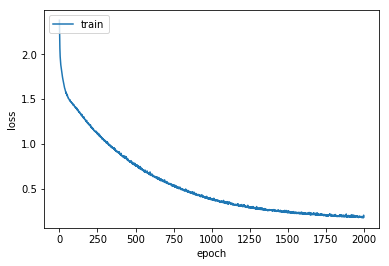

In [12]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


50/50 [==============================] - 0s 3ms/step
acc: 92.00%


In [14]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)


one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
